Punto 1: <br/>
Diseñar un programa modular que permita lo siguiente: <br/>

1. Agregar un contacto por el usuario, debe permitir ingresar nombre, número de teléfono y mail, además al contacto se lo almacenará en un fichero denominado contacto.txt cada contacto nuevo que se ingrese debe estar en línea diferentes y los datos separados por comas.<br/>
2. Antes de guardar un nuevo contacto validar que el @ no debe estar al principio ni al final de la cadena y que como mínimo debe tener 7 caracteres.<br/>
3. Validar que el nombre no posea caracteres especiales ni números.<br/>
4. Buscar un contacto por el nombre y se debe mostrar nombre y número de teléfono, si el contacto no existe mostrar un mensaje.


In [1]:
import re
from io import open


def validarMail():

    while True:
        mail = input("Ingrese el mail: ")
        if len(mail) >= 7:
            if "@" in mail:
                if mail[0] != "@" and mail[-1] != "@":
                    return mail
                else:
                    print("El @ no puede estar ni al principio ni al final")
            else:
                print("Mail inválido. Falta el @")
        else:
            print(
                "Demasiado corto,la cantidad de carácteres debe ser igual o mayor a siete")


def validarNombre(mensaje):

    patron = r"^[a-zA-Z+-/ ']+$"
    # while True:
    # --patron="abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ+-/ '"
    # --valido=True
    # --for caracter in nombre :
    # ----if caracter not in patron:
    # ------print("Nombre no válido")
    # ------valido=False
    # ------break
    # --if valido: break
    while True:
        nombre = input(mensaje)
        if re.match(patron, nombre):
            return nombre
        else:
            print("Nombre no válido")


def validarTelefono():

    while True:
        telefono = input("Ingrese el teĺefono(7 digitos)")
        if telefono.isdigit():
            if len(telefono) >= 7:
                return telefono
            else:
                print("Debe tener al menos 7 digitos")
        else:
            print("Error. Ingrese solo números")


def agregarContacto():
    nombre = validarNombre("Ingrese el nombre: ")
    telefono = validarTelefono()
    mail = validarMail()
    contacto = nombre+", "+telefono+", "+mail

    contactos = open('contactos.txt', 'a+')
    contactos.write(contacto+"\n")
    contactos.close()


def leerContactos(contactos):
    existeFichero = False
    try:
        with open('contactos.txt', 'r') as ficheroContactos:
            for contacto_txt in ficheroContactos:
                contacto = contacto_txt.read().strip().split(",")
                contactos.append(contacto)

        existeFichero = True

    except FileNotFoundError:
        print("No existe un fichero de contactos aún")

    return existeFichero


def buscarContacto():
    contactos = []
    existeFichero = leerContactos(contactos)
    if existeFichero:
        nombre = validarNombre("Ingrese el nombre a buscar: ").strip().lower()
        encontrado = False
        for contacto in contactos:
            if nombre == contacto[0].strip().lower():
                print(f"Nombre:{contacto[0]}, teléfono:{contacto[1]} ")
                encontrado = True
                break
        if not encontrado:
            print("No existe el contacto buscado")


def main():
    while True:
        try:
            op = int(input("Ingrese una opción"))
        except ValueError:
            print("Opción inválida.Ingrese un Nº")

        if op == 1:

            agregarContacto()

        elif op == 2:

            buscarContacto()

        elif op == 3:
            print("Saliendo...")
            break

        else:
            print("No existe la opción seleccionada")


main()

Saliendo...


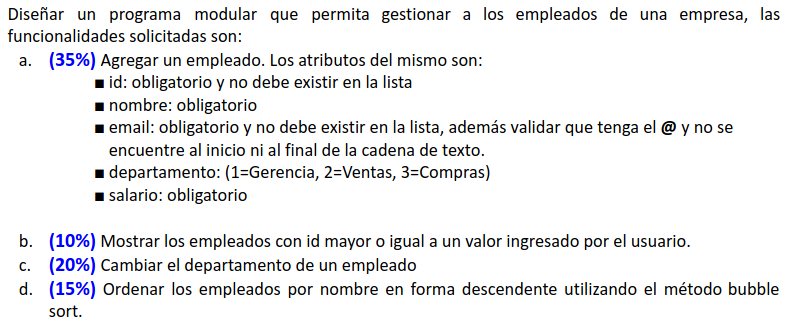


In [2]:
import re


def validarId(lista, mensaje):
    while True:
        id = input(mensaje)
        if len(lista) == 0 or not any(empleado[0] == id for empleado in lista):
            return id
        else:
            print("Ya existe. Ingrese otro")


def validarNombre(mensaje):
    patron = r'^[a-zA-Z + - _ *]+$'
    while True:
        nombre = input(mensaje)
        if re.match(patron, nombre):
            return nombre
        else:
            print("Nombre no válido, ingrese otro")


def validarMail(lista, mensaje):
    while True:
        mail = input(mensaje)
        tieneArroba = False
        cont = 0
        for i in mail:
            if i == "@":
                tieneArroba = True
                cont += 1

        if tieneArroba and cont == 1:
            if mail[0] == "@" or mail[-1] == "@":
                print("@ no puede estar al principio ni al final")
            else:
                if len(lista) == 0 or not any(empleado[2] == mail for empleado in lista):
                    return mail
                else:
                    print("Ya existe el correo. Ingrese otro")

        else:
            print("Mail no válido. Debe contener un @")


def validarDep(mensaje):
    while True:
        try:
            dep = int(input(mensaje))
            if dep == 1 or dep == 2 or dep == 3:
                return dep
            else:
                print("No disponible")
        except ValueError:
            print("Error. Debe ingresar un número")


def validarSalario(mensaje):
    while True:
        try:
            salario = input(mensaje)
            if len(salario) != 0:
                float(salario)
                return salario
            else:
                print("No puede estar vacío. Ingrese un valor")
        except ValueError:
            print("Formato no válido. Ingrese nuevamente")


def agregarEmpleado(lista):
    id = validarId(lista, "Ingrese un ID: ")
    nombre = validarNombre("Ingrese el nombre: ")
    mail = validarMail(lista, "Ingrese el Email: ")
    departamento = validarDep(
        "Ingrese departamento= 1:Gerencia, 2:Ventas 3:Compras :  ")
    salario = validarSalario("Ingrese el salario: ")
    lista.append([id, nombre, mail, departamento, salario])


def mostrarEmpleados(lista):
    for empleado in lista:
        print(empleado)  # No se puede empleado+"\n"


def cambiarDep(lista):
    empleadoNombre = input("Nombre del empleado a cambiar departamento: ")
    for empleado in lista:
        if empleado[1] == empleadoNombre:
            nuevoDep = validarDep("Nuevo departamento")
            empleado[3] = nuevoDep


def ordenarPorNombre(lista):
    n = len(lista)
    for i in range(n-1):
        for j in range(n-1-i):
            if lista[j][1] > lista[j+1][1]:
                lista[j], lista[j+1] = lista[j+1], lista[j]
    mostrarEmpleados(lista)


def main():
    lista = []
    while True:
        try:
            op = int(input("Opción: "))
        except ValueError:
            print("Error. Debe ingresar un número")

        if op:
            if op == 1:
                agregarEmpleado(lista)
            elif op == 2:
                if len(lista) != 0:
                    mostrarEmpleados(lista)
                else:
                    print('Lista vacía')
            elif op == 3:
                if len(lista) != 0:
                    cambiarDep(lista)
                else:
                    print('Lista vacía')
            elif op == 4:
                if len(lista) != 0:
                    ordenarPorNombre(lista)
                else:
                    print('Lista vacía')
            elif op == 5:
                print("Saliendo...")
                break
            else:
                print('Opción no válida')


main()

Mail no válido. Debe contener un @
Saliendo...


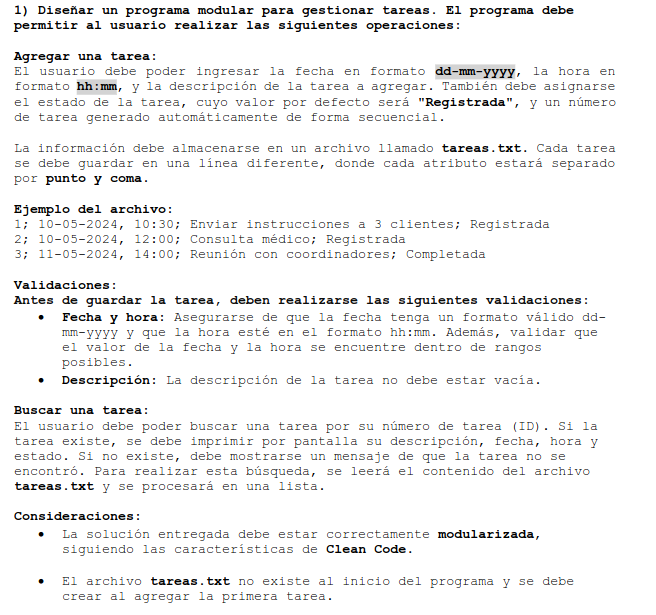


In [4]:
from datetime import datetime
from io import open


def validarId(tareas):
    while True:
        try:
            id = int(input("Ingresar ID: "))
            if len(tareas) == 0 or not any(int(tarea[0]) == id for tarea in tareas):
                return id
            else:
                print("Ya existe el ID. Ingrese otro")

        except ValueError:
            print("Formato inválido")


def validarFecha():
    formato = "%d-%m-%Y"  # "%d/%m/%Y"
    while True:
        fecha_str = input("Ingresar fecha: ")
        try:
            fecha = datetime.strptime(fecha_str, formato)
            if fecha.year < 2999:
                return fecha
            else:
                print("Año fuera de los limites")
        except ValueError:
            print(f"Fecha inválida. Ingrese la fecha en el formato {formato}")


def validarHora():
    formato = "%H:%M"
    while True:
        hora_str = input("Ingrese la hora: ")
        try:
            hora = datetime.strptime(hora_str, formato)
            return hora
        except ValueError:
            print(f"Hora inválida. Ingrese la hora en el formato {formato}")


def validarDescripcion():
    while True:
        descripcion = input("Descripcion: ")
        if len(descripcion) != 0:
            return descripcion
        else:
            print("No puede estar vacía. Ingrese algo")


def validarEstado():
    while True:
        estado = input("Estado R(resgistrada) / C (completada) ").lower()
        if estado == "r" or estado == "c":
            return estado
        else:
            print("Estado no válido. Ingrese R o C")


def agregarATareas(tarea):
    tarea_txt = ", ".join(tarea)
    fichero = open("./tareas.txt", "a+")
    fichero.write(tarea_txt+"\n")
    fichero.close()


def ingresarDatos(tareas):
    id = str(validarId(tareas))
    fecha = (validarFecha()).strftime("%d-%m-%Y")
    hora = validarHora().strftime("%H:%M")
    descripcion = validarDescripcion()
    estado = validarEstado()
    tarea = [id, fecha, hora, descripcion, estado]
    agregarATareas(tarea)


def leerFichero(tareas):
    existeFichero = False
    try:
        with open("./tareas.txt", "r") as tareas_txt:
            for tarea_txt in tareas_txt:
                tarea = tarea_txt.read().strip().split(";")
                tareas.append(tarea)
        existeFichero = True

    except FileNotFoundError:
        print("No se encontró el fichero")
    return existeFichero


def buscarTareaPorId(tareas):
    encontrado = False
    if leerFichero(tareas):
        idBuscado = input("Ingrese ID de la tarea a buscar: ")
        for tarea in tareas:
            if tarea[0] == idBuscado:
                encontrado = True
                print(f"Descripcion: {tarea[3]} \nFecha: {
                      tarea[1]}\nHora: {tarea[2]} ")

                break

    if not encontrado:
        print("No se encontró la tarea")


def mostrarTareas(tareas):
    if leerFichero(tareas):
        for tarea in tareas:
            print(tarea)
    else:
        (" No hay nada para mostrar")


def main():
    tareas = []

    while True:
        try:
            op = int(input("Opción: "))
        except ValueError:
            print("Error. Debe ingresarun número")
        if op:
            if op == 1:
                ingresarDatos(tareas)
            elif op == 2:
                mostrarTareas(tareas)
            elif op == 3:
                buscarTareaPorId(tareas)
            elif op == 4:
                print("Saliendo")
                break
            else:
                print('Opción no válida')


main()

Error. Debe ingresarun número


UnboundLocalError: cannot access local variable 'op' where it is not associated with a value

In [ ]:
def validarId(sitiosWeb):
    while True:
        id = input("Ingrese el ID")
        if len(id) >= 6:
            if len(sitiosWeb) == 0 or not any(web[0] == id for web in sitiosWeb):
                return id
            else:
                print("Ya existe el ID")
        else:
            print("Debe tener al menos 6 digitos")


def validar_categoria(categoria):
    categorias_validas = ['Buscador', 'Enciclopedia',
                          'Redes Sociales', 'E-commerce']
    if categoria not in categorias_validas:
        raise ValueError(f"Categoría debe ser uno de los siguientes: {
                         ', '.join(categorias_validas)}")

In [ ]:

def burbuja(lista):
    n = len(lista)

    for i in range(n-1):
        for j in range(n-1-i):
            if lista[j][0] > lista[j+1][0]:  # Ascendente
                lista[j], lista[j+1] = lista[j+1], lista[j]
    return lista


def seleccion(lista):
    n = len(lista)
    for i in range(n):
        for j in range(i+1, n):
            if lista[i][0] > lista[j][0]:  # Ascendente
                lista[j], lista[i] = lista[i], lista[j]
    return lista


def inserccion(lista):
    n = len(lista)
    for i in range(1, n):
        for j in range(i-1, -1, -1):
            if lista[j][0] > lista[j+1][0]:
                lista[j], lista[j+1] = lista[j+1], lista[j]
    return lista


def quicksort(lista):
    n = len(lista)
    if n <= 1:
        return lista
    else:
        pivot = lista[n // 2][0]
        # Cambiar a > para orden descendente
        subListaIzq = [x for x in lista if x[0] < pivot]
        subListaMedio = [x for x in lista if x[0] == pivot]
        # Cambiar a > para orden ascendente
        subListaDer = [x for x in lista if x[0] > pivot]

    # Llamadas recursivas para ordenar las sublistas
        lista[:] = quicksort(subListaIzq) + \
            subListaMedio + quicksort(subListaDer)
        return lista


def shell(lista):
    n = len(lista)
    gap = n//2

    while gap > 0:
        for i in range(gap, n):
            temp = lista[i]
            j = i
            # Cambiar a (< temp) para descendente
            while j >= gap and lista[j-gap][0] > temp[0]:
                lista[j] = lista[j-gap]
                j -= gap
            lista[j] = temp
        gap = gap//2
    return lista


def busquedaSecuencial(lista, elemento):
    n = len(lista)
    for i in range(n):
        if lista[i][0] == elemento:
            return i  # Retorna el índice donde se encuentra el objetivo
    return -1  # Retorna -1 si el objetivo no se encuentra en la lista


def busqueda_binaria(lista, elemento):
    n = len(lista)
    izquierda = 0
    derecha = n - 1

    while izquierda <= derecha:
        medio = (izquierda + derecha) // 2
        if lista[medio][0] == elemento:
            return medio  # Retorna el índice donde se encuentra el objetivo
        elif lista[medio][0] < elemento:
            izquierda = medio + 1
        else:
            derecha = medio - 1

    return -1  # Retorna -1 si el objetivo no se encuentra en la lista


def main():
    lista = [[3, "nana"], [1, "lolo"], [2, "ani"]]
    # listaOrdenada=burbuja(lista)
    # listaOrdenada=seleccion(lista)
    # listaOrdenada = inserccion(lista)
    # listaOrdenada = quicksort(lista)
    # listaOrdenada = shell(lista)

    # resultado = busquedaSecuencial(lista, 3)
    resultado = busqueda_binaria(lista, 1)
    print(resultado)


main()